In [ ]:
#기초데이터과학 과제2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("train.csv")
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(data.info())
'''
PassengerId : 승객 번호
Survived : 0 = 사망, 1 = 생존
Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
Sex : male = 남성, female = 여성
Age : 나이
SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
Parch : 타이타닉 호에 동승한 부모 / 자식의 수
Ticket : 티켓 번호
Fare : 승객 요금
Cabin : 방 호수
Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
'''
#Name, Sex, Ticket, Cabin, Embarked를 제외한 나머지 열은 모두 실수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


'\nPassengerId : 승객 번호\nSurvived : 0 = 사망, 1 = 생존\nPclass : 1 = 1등석, 2 = 2등석, 3 = 3등석\nSex : male = 남성, female = 여성\nAge : 나이\nSibSp : 타이타닉 호에 동승한 자매 / 배우자의 수\nParch : 타이타닉 호에 동승한 부모 / 자식의 수\nTicket : 티켓 번호\nFare : 승객 요금\nCabin : 방 호수\nEmbarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴\n'

In [4]:
print(data.isna().sum())
#Age는 나이, 중요 정보 -> 결측치 채우기
#Cabin은 방 호수, 중요 정보x -> 결측치 제거는 하지 않고 고려x
#Embarked 중요하지만 결측치가 2개임 -> 바로 위에 값으로 결측치 채우기

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df_part = data[['Age', 'SibSp', 'Parch']]
print(df_part.describe())

              Age       SibSp       Parch
count  714.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594
std     14.526497    1.102743    0.806057
min      0.420000    0.000000    0.000000
25%     20.125000    0.000000    0.000000
50%     28.000000    0.000000    0.000000
75%     38.000000    1.000000    0.000000
max     80.000000    8.000000    6.000000


In [6]:
invalid_age = data[(data['Age'] > 100) | (data['Age'] < 1)] #1살 미만의 나이 -> 아기(몇개월 수) 
print(invalid_age)
#나이가 비정상적이게 높은 경우와 낮은 경우가 없음

     PassengerId  Survived  Pclass                             Name     Sex  \
78            79         1       2    Caldwell, Master. Alden Gates    male   
305          306         1       1   Allison, Master. Hudson Trevor    male   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
644          645         1       3           Baclini, Miss. Eugenie  female   
755          756         1       2        Hamalainen, Master. Viljo    male   
803          804         1       3  Thomas, Master. Assad Alexander    male   
831          832         1       2  Richards, Master. George Sibley    male   

      Age  SibSp  Parch  Ticket      Fare    Cabin Embarked  
78   0.83      0      2  248738   29.0000      NaN        S  
305  0.92      1      2  113781  151.5500  C22 C26        S  
469  0.75      2      1    2666   19.2583      NaN        C  
644  0.75      2      1    2666   19.2583      NaN        C  
755  0.67      1      1  250649   14.5000      NaN       

In [7]:
# NaN 값의 인덱스 가져오기
nan_idx = data['Age'][data['Age'].isna()].index

# 짝수 인덱스의 NaN 값만 선택
even_nan_idx = list(filter(lambda i: i % 2 == 0, nan_idx))

# 선택된 NaN 값을 평균값으로 채우기
data.loc[even_nan_idx, 'Age'] = data['Age'].mean()

# 결과 출력
print(data.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             85
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
print(data['Age'].quantile(0.65)) #Age열의 상위 65% 나이

32.0


In [9]:
data['Age'] = data['Age'].fillna(data['Age'].quantile(0.65))
print(data.isna().sum())
#나이 상위 65%값으로 나머지 NaN 값 채우기

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
#Embarked 결측치 바로 위에 값으로 채우기
data['Embarked'].fillna(method = 'ffill')
print(data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\dladk\AppData\Local\Temp\ipykernel_21932\343257931.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Embarked'].fillna(method = 'ffill')


In [11]:
#영어권 이름 특징을 고려하여 성, 이름 중 이름만 남기도록 함
data['Name'] = data['Name'].str.extract(r'^([^,]+)')
print(data[['Name']])

          Name
0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
..         ...
886   Montvila
887     Graham
888   Johnston
889       Behr
890     Dooley

[891 rows x 1 columns]


In [12]:
#데이터 탐색
# 나이별로 생존 여부를 그룹화하여 생존률 계산
age_survival = data.groupby('Age')['Survived'].mean()

# 결과 출력
print(age_survival)


Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 89, dtype: float64


In [13]:
# 생존자 수와 성별과의 연관성
print(data[['Sex','Survived']].groupby('Sex', as_index = False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [14]:
#생존자 수와 등석에 따른 연관성
print(data[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


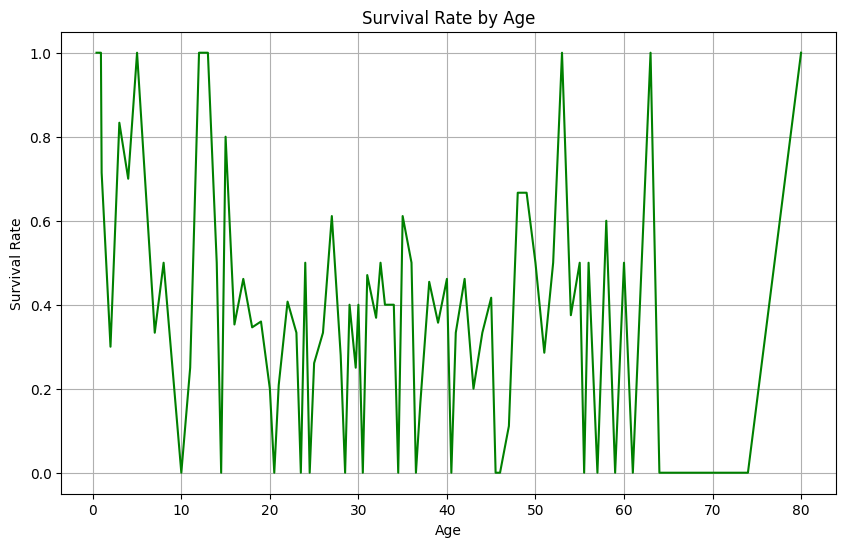

In [15]:
#matplotlib 그래프
plt.figure(figsize=(10,6))
age_survival.plot(kind='line', color='g')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

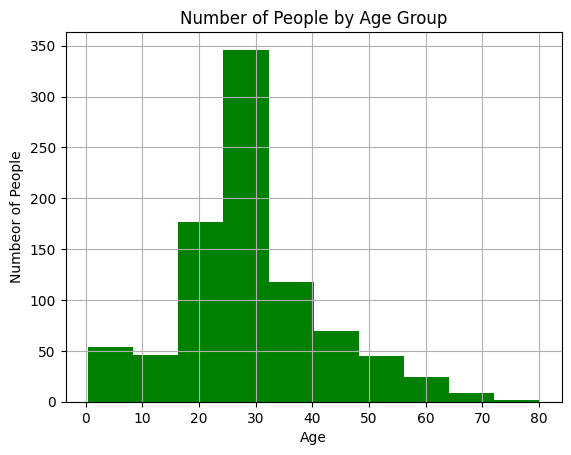

In [16]:
#연령대 별 사람 수
plt.title('Number of People by Age Group')
plt.xlabel('Age')
plt.ylabel('Numbeor of People')
plt.grid(True)
plt.hist(data['Age'], color='green')

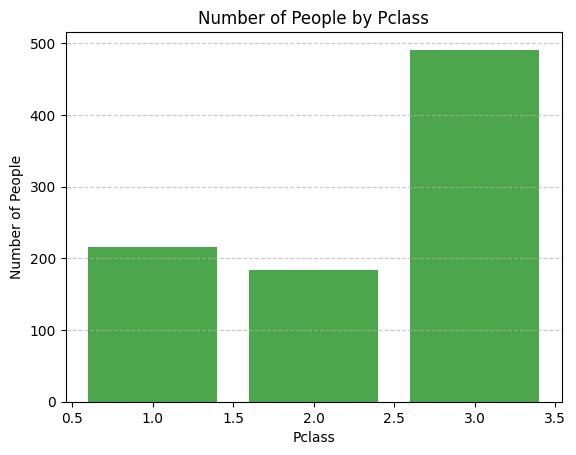

In [17]:
#등석 수 별 사람 수
class_counts = data['Pclass'].value_counts().sort_index()

plt.bar(class_counts.index, class_counts.values, color='green', alpha=0.7)
plt.title('Number of People by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

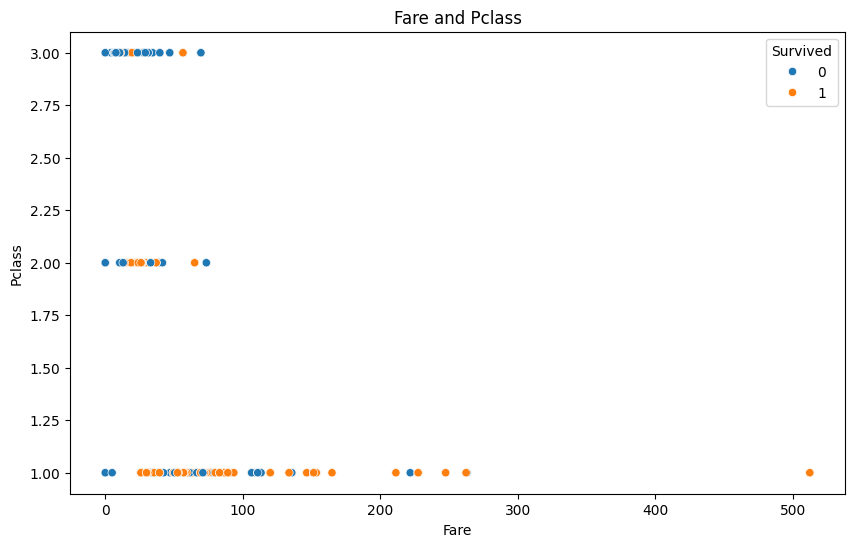

In [18]:
#요금과 등석에 따른 생존 차이
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Fare", y="Pclass", hue="Survived")
plt.title("Fare and Pclass")
plt.xlabel("Fare")
plt.ylabel("Pclass")
plt.legend(title="Survived")
plt.show()

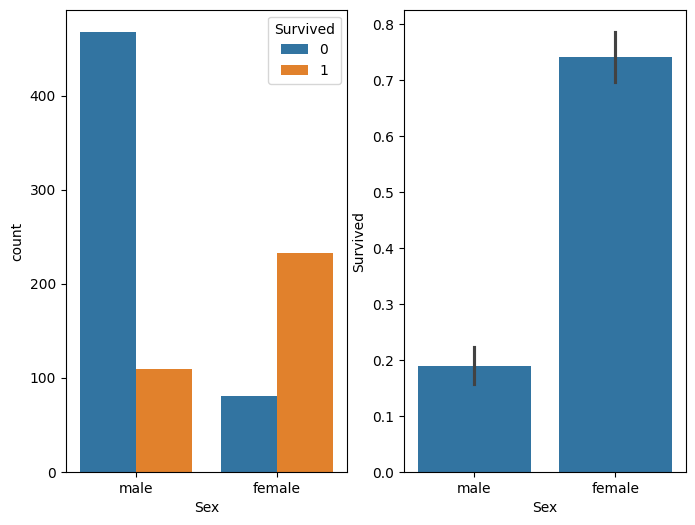

In [19]:
#성별에 따른 승객수, 성별에 따른 생존자 수
#객체지향 프로그래밍
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

ax1 = sns.countplot(x='Sex', data=data, hue='Survived', ax=ax[0])
ax2 = sns.barplot(x='Sex', y='Survived', data=data, ax=ax[1])


In [20]:
#seaborn

In [21]:
#요금별 생존
#embarked별 생존
#자매, 부모 수 차이
#스캐터플랏, 히트맵
#나이에 따른 생존자수

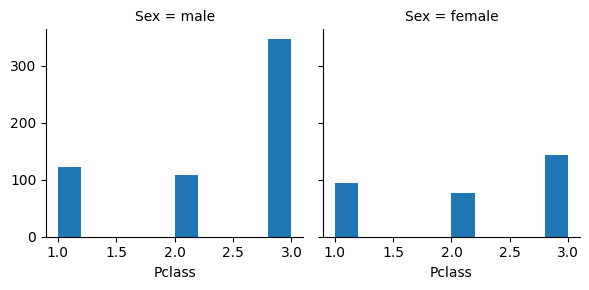

In [22]:
#성별 별 등석 차이
g = sns.FacetGrid(data, col="Sex")
g.map(plt.hist, "Pclass")

Text(44.95014583333334, 0.5, 'Fare')

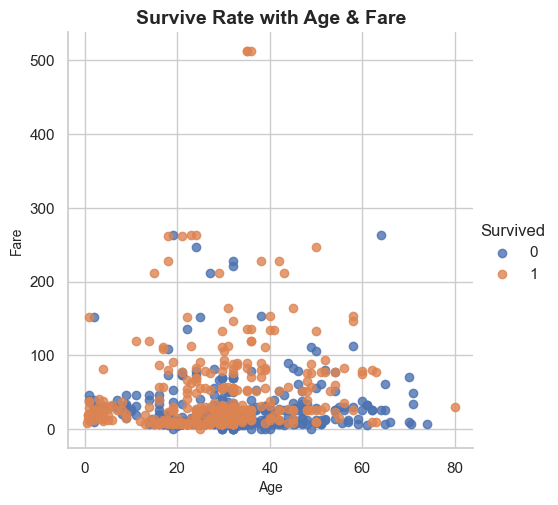

In [23]:
#나이, 요금별 생존자
sns.set_theme(style="whitegrid")
sns.lmplot(x='Age', y='Fare', data=data, hue = 'Survived', fit_reg=False) #회귀선
plt.title('Survive Rate with Age & Fare', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Fare', fontsize=10)


Text(0, 0.5, 'Passenger Count')

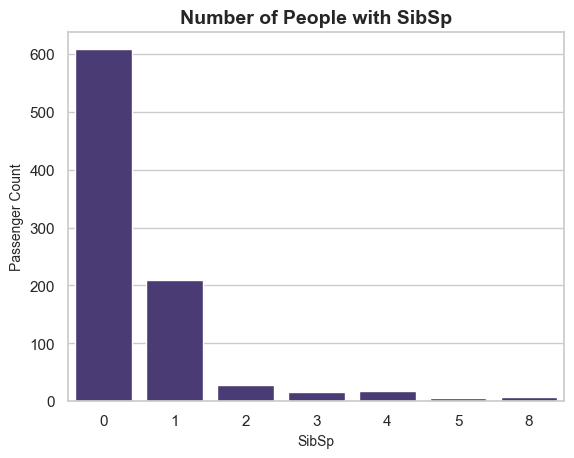

In [24]:
#형재 자매 수 별 사람 수
sns.set_theme(style="whitegrid", palette="viridis")
sns.countplot(data=data, x='SibSp')
plt.title('Number of People with SibSp', fontsize=14, fontweight='bold')
plt.xlabel('SibSp', fontsize=10)
plt.ylabel('Passenger Count', fontsize=10)

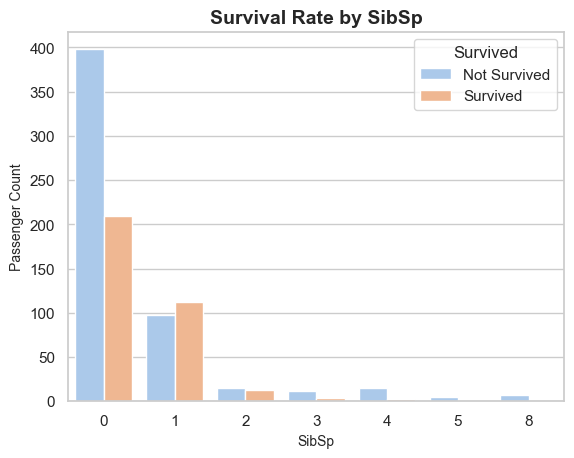

In [25]:
#형재 자매 여부 생존률
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(data=data, x='SibSp', hue='Survived')
plt.title('Survival Rate by SibSp', fontsize=14, fontweight='bold')
plt.xlabel('SibSp', fontsize=10)
plt.ylabel('Passenger Count', fontsize=10)

# 범례 설정
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])

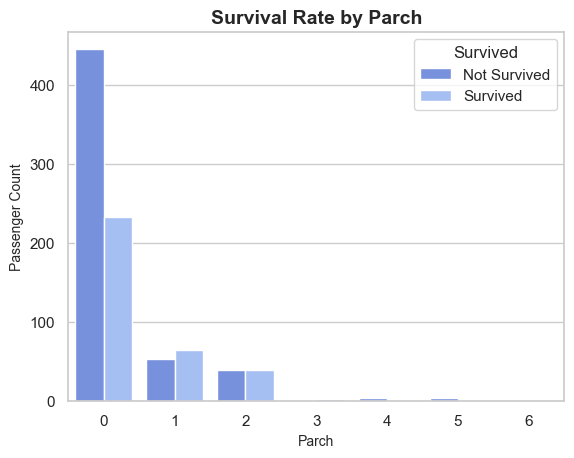

In [26]:
#부모 여부 생존률
sns.set_theme(style="whitegrid", palette="coolwarm")
sns.countplot(data=data, x='Parch', hue='Survived')
plt.title('Survival Rate by Parch', fontsize=14, fontweight='bold')
plt.xlabel('Parch', fontsize=10)
plt.ylabel('Passenger Count', fontsize=10)

# 범례 설정
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])

Text(0, 0.5, 'Passenger Count')

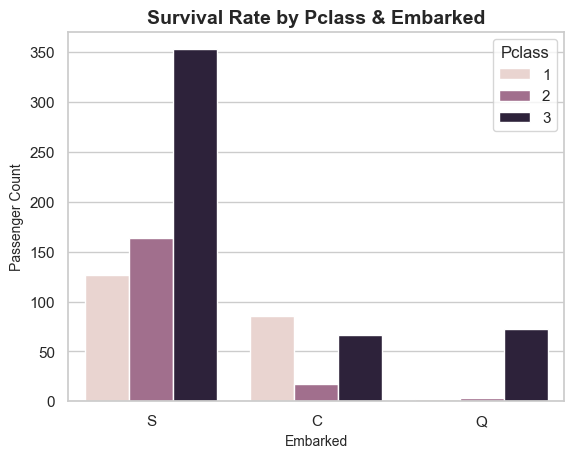

In [27]:
#탑승지 별, 등석 별 사람 수
sns.set_theme(style='whitegrid')
sns.countplot(data=data, x='Embarked' , hue='Pclass')
plt.title('Survival Rate by Pclass & Embarked', fontsize=14, fontweight='bold')
plt.xlabel('Embarked', fontsize=10)
plt.ylabel('Passenger Count', fontsize=10)

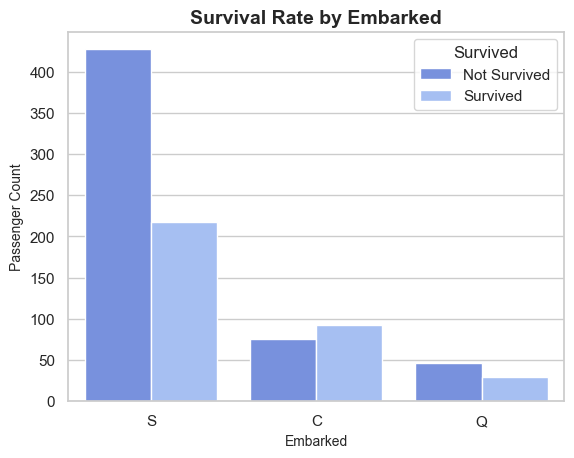

In [28]:
#탑승지 별 생존률
sns.set_theme(style="whitegrid", palette="coolwarm")
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.title('Survival Rate by Embarked', fontsize=14, fontweight='bold')
plt.xlabel('Embarked', fontsize=10)
plt.ylabel('Passenger Count', fontsize=10)

# 범례 설정
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])

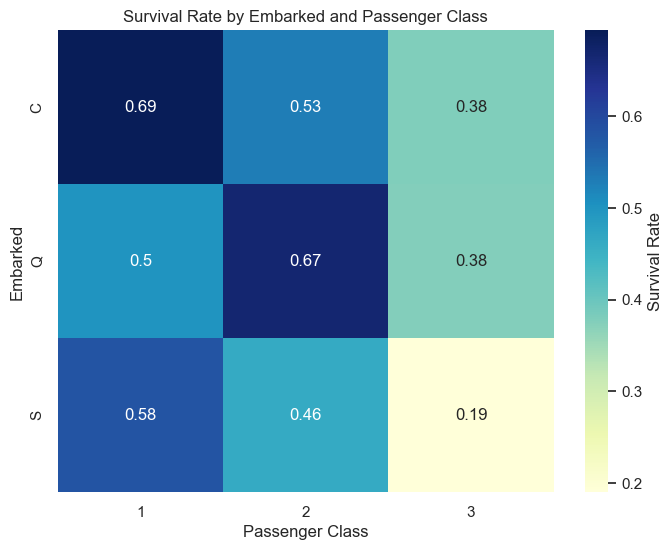

In [29]:
# Embarked와 생존률을 계산
embarked_survival = data.pivot_table("Survived", index="Embarked", columns="Pclass")

#탑승지 + 등석 별 생존률률
plt.figure(figsize=(8, 6))
sns.heatmap(embarked_survival, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Survival Rate'})
plt.title("Survival Rate by Embarked and Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Embarked")
plt.show()

In [30]:
#결과
'''
요금을 많이 낸 사람들(등석에 따른)은 생존 확률이 높았다.
남성보다는 여성이 생존 확률이 높았다.
S > Q > C 순으로 사망률이 높다. (S가 가장 사망률 높음, Q, C 순서)
배우자나 형제자매가 있으면 사망률이 낮다.
부모님이나 자식이 있으면 사망률이 낮다.
15~30대가 가장 많이 사망했다.
S탑승지에서 가장 많은 사람들이 탑승했다.
Q탑승지에서 탑승한 사람 대부분은 3등석이다. -> 가장 생존률이 낮다.
'''

'\n요금을 많이 낸 사람들(등석에 따른)은 생존 확률이 높았다.\n남성보다는 여성이 생존 확률이 높았다.\nS > Q > C 순으로 사망률이 높다. (S가 가장 사망률 높음, Q, C 순서)\n배우자나 형제자매가 있으면 사망률이 낮다.\n부모님이나 자식이 있으면 사망률이 낮다.\n15~30대가 가장 많이 사망했다.\nS탑승지에서 가장 많은 사람들이 탑승했다.\nQ탑승지에서 탑승한 사람 대부분은 3등석이다. -> 가장 생존률이 낮다.\n'